In [252]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Make particle positions

In [276]:
dX,dY,dZ = [np.random.rand(100)*2000 for _ in range(3)]
rX,rY,rZ = [np.random.rand(1000)*2000 for _ in range(3)]
rX2,rY2,rZ2 = [np.random.rand(1000)*2000+800 for _ in range(3)]
# create jackknifes
dJ = np.zeros_like(dZ)
rJ = np.zeros_like(rZ)
rJ2 = np.zeros_like(rZ2)
dJ[dZ>1000]=1.
rJ[rZ>1000]=1.
rJ2[rZ2>1000]=1.

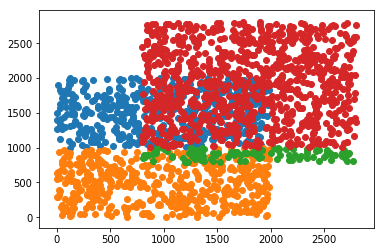

In [277]:
plt.scatter(rX[rJ==1],rZ[rJ==1])
plt.scatter(rX[rJ==0],rZ[rJ==0])
plt.scatter(rX2[rJ2==0],rZ2[rJ2==0])
plt.scatter(rX2[rJ2==1],rZ2[rJ2==1])

In [278]:
binfile = np.asarray([[0.0,100],[100,200.]])
np.savetxt("tmp_binfile.csv",binfile)

In [279]:
from Corrfunc.theory.DDsmu import DDsmu
DallRall = DDsmu(0,1,"tmp_binfile.csv",1.,4,dX,dY,dZ,X2=rX,Y2=rY,Z2=rZ,periodic=False)

In [280]:
DJ1Rall = DDsmu(0,1,"tmp_binfile.csv",1.,4,dX[dJ==1],dY[dJ==1],dZ[dJ==1],X2=rX,Y2=rY,Z2=rZ,periodic=False)
DJ0Rall = DDsmu(0,1,"tmp_binfile.csv",1.,4,dX[dJ==0],dY[dJ==0],dZ[dJ==0],X2=rX,Y2=rY,Z2=rZ,periodic=False)
DJallR1 = DDsmu(0,1,"tmp_binfile.csv",1.,4,dX,dY,dZ,X2=rX[rJ==1],Y2=rY[rJ==1],Z2=rZ[rJ==1],periodic=False)
DJallR0 = DDsmu(0,1,"tmp_binfile.csv",1.,4,dX,dY,dZ,X2=rX[rJ==0],Y2=rY[rJ==0],Z2=rZ[rJ==0],periodic=False)

In [281]:
DRjack1=DJ1Rall['npairs']+DJallR1['npairs']
DRjack0=DJ0Rall['npairs']+DJallR0['npairs']

### Check $RR_{aA}$ counts

In [282]:
def jk_sum(jk):
    all_summ=0.
    summ=0.
    for i in range(len(rX)):
        for j in range(len(dX)):
            dis=np.sqrt((rX[i]-dX[j])**2.+(rY[i]-dY[j])**2.+(rZ[i]-dZ[j])**2.)
            if (dis<100)&(dis>50):
                all_summ+=1
                if rJ[i]==jk:
                    summ+=0.5
                if dJ[j]==jk:
                    summ+=0.5
    return summ,all_summ

In [283]:
DRa0,DRa=jk_sum(0)
DRa1,DRa=jk_sum(1)

In [261]:
dX=rX
dY=rY
dZ=rZ
dJ=rJ

In [284]:
DRa0cf_1=DDsmu(0,1,np.linspace(50,100,2),1.,1, rX[rJ==0],rY[rJ==0],rZ[rJ==0],X2=dX,Y2=dY,Z2=dZ,periodic=False)
DRa0cf_2=DDsmu(0,1,np.linspace(50,100,2),1.,1, dX[dJ==0],dY[dJ==0],dZ[dJ==0],X2=rX,Y2=rY,Z2=rZ,periodic=False)
DRa1cf_1=DDsmu(0,1,np.linspace(50,100,2),1.,1, rX[rJ==1],rY[rJ==1],rZ[rJ==1],X2=dX,Y2=dY,Z2=dZ,periodic=False)
DRa1cf_2=DDsmu(0,1,np.linspace(50,100,2),1.,1, dX[dJ==1],dY[dJ==1],dZ[dJ==1],X2=rX,Y2=rY,Z2=rZ,periodic=False)

In [285]:
DRacf=DDsmu(0,1,np.linspace(50,100,2),1.,1,rX,rY,rZ,X2=dX,Y2=dY,Z2=dZ,periodic=False)

In [286]:
print(DRa0,DRa1,DRa)
print(0.5*(DRa0cf_1['npairs']+DRa0cf_2['npairs']),0.5*(DRa1cf_1['npairs']+DRa1cf_2['npairs']),DRacf['npairs'])
print(DRa0cf_1['npairs'],DRa1cf_1['npairs'],DRacf['npairs'])

20.5 32.5 53.0
[20.5] [32.5] [53]
[21] [32] [53]


In [287]:
RRa0cf['savg']

array([0.])